### Lets Recommend Movies
* movielens dataset

In [3]:
import pandas as pd

## Read Data

In [4]:
movies = pd.read_csv('./data/ml-latest-small/movies.csv', index_col ='movieId')

## Preprocessing

In [5]:
movies['year'] = movies['title'].str.extract('(\(\d\d\d\d\))')

In [6]:
movies['year'] = movies['year'].str.extract('(\d\d\d\d)')

In [7]:
movies['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908'], dtype=object)

In [8]:
movies[movies['year'].isnull()]

,title,genres,year
movieId,,,
40697,Babylon 5,Sci-Fi,NaN
140956,Ready Player One,Action|Sci-Fi|Thriller,NaN
143410,Hyena Road,(no genres listed),NaN
147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
149334,Nocturnal Animals,Drama|Thriller,NaN
156605,Paterson,(no genres listed),NaN
162414,Moonlight,Drama,NaN
167570,The OA,(no genres listed),NaN
171495,Cosmos,(no genres listed),NaN


In [9]:
movies['year'] = movies['year'].fillna('2050')

In [10]:
import numpy as np

In [11]:
print(movies['year'].value_counts())
print(np.argmax(movies['year'].value_counts()))

2002    311
2006    295
2001    294
2007    284
2000    283
2009    282
2003    279
2004    279
2014    278
1996    276
2015    274
2005    273
2008    269
1999    263
1997    260
1995    259
1998    258
2011    254
2010    247
2013    239
1994    237
2012    233
2016    218
1993    198
1992    167
1988    165
1987    153
1991    147
2017    147
1990    147
       ... 
1945     17
1952     16
1944     16
1937     16
1938     15
1931     14
2050     13
1935     13
1933     12
1934     11
1943     10
1932      9
1927      7
1926      5
1930      5
1924      5
1923      4
1925      4
1928      4
1929      4
1916      4
1920      2
1908      1
1915      1
1919      1
1903      1
1922      1
1921      1
1917      1
1902      1
Name: year, Length: 107, dtype: int64
2002


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [12]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

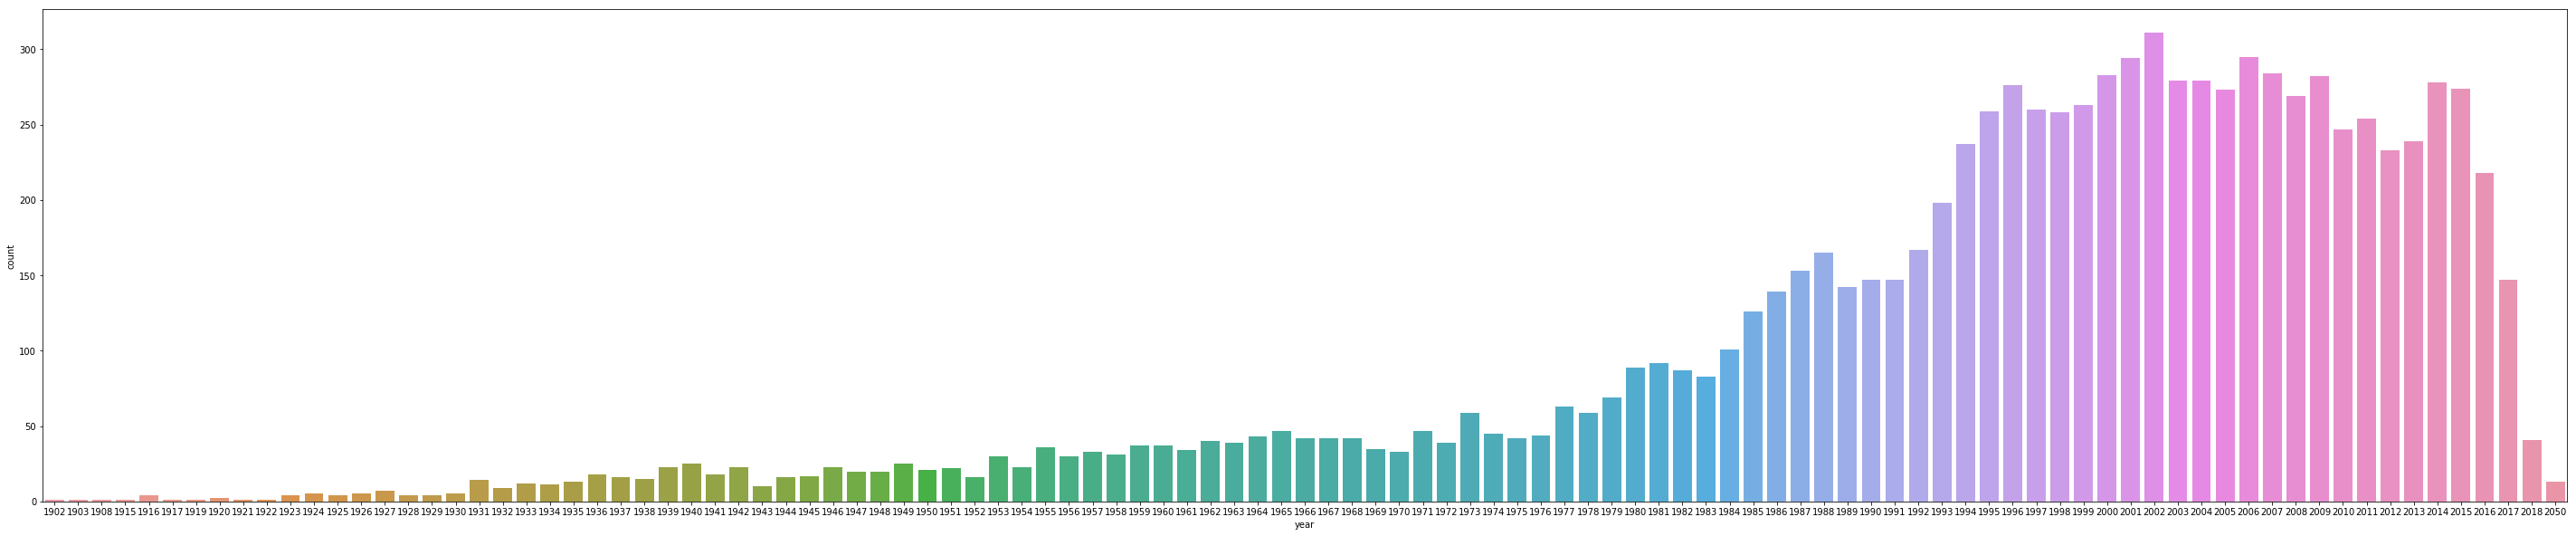

In [13]:
plt.figure(figsize=(50, 10))
sns.countplot(data=movies, x='year')

* genres 분석

In [14]:
sample_genres = movies['genres'][1]
sample_genres

'Adventure|Animation|Children|Comedy|Fantasy'

In [15]:
sample_genres.split('|')

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [16]:
genres_list = list(movies['genres'].apply(lambda x: x.split('|')))

In [17]:
flat_list = []
for sub_list in genres_list:
    for genre in sub_list:
        if genre not in flat_list:
            flat_list.append(genre)

In [18]:
print(len(flat_list))
flat_list

20


['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

* dummy coding

* 1번째 방법 -> true or false 반환

In [19]:
# for genre in flat_list:
#     movies[genre] = movies['genres'].apply(lambda x: genre in x)

In [20]:
movies.head()

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995


* 2번째 방법 -> 1, 0 반환

In [21]:
genres_dummies = movies['genres'].str.get_dummies(sep='|')
# csv로 저장하는거보다 pickle 파일로 저장하는게 pd.frame 정보가 담겨서 좋다.
genres_dummies.to_pickle('./data/ml-latest-small/genres.p')

* genre 간 correlation

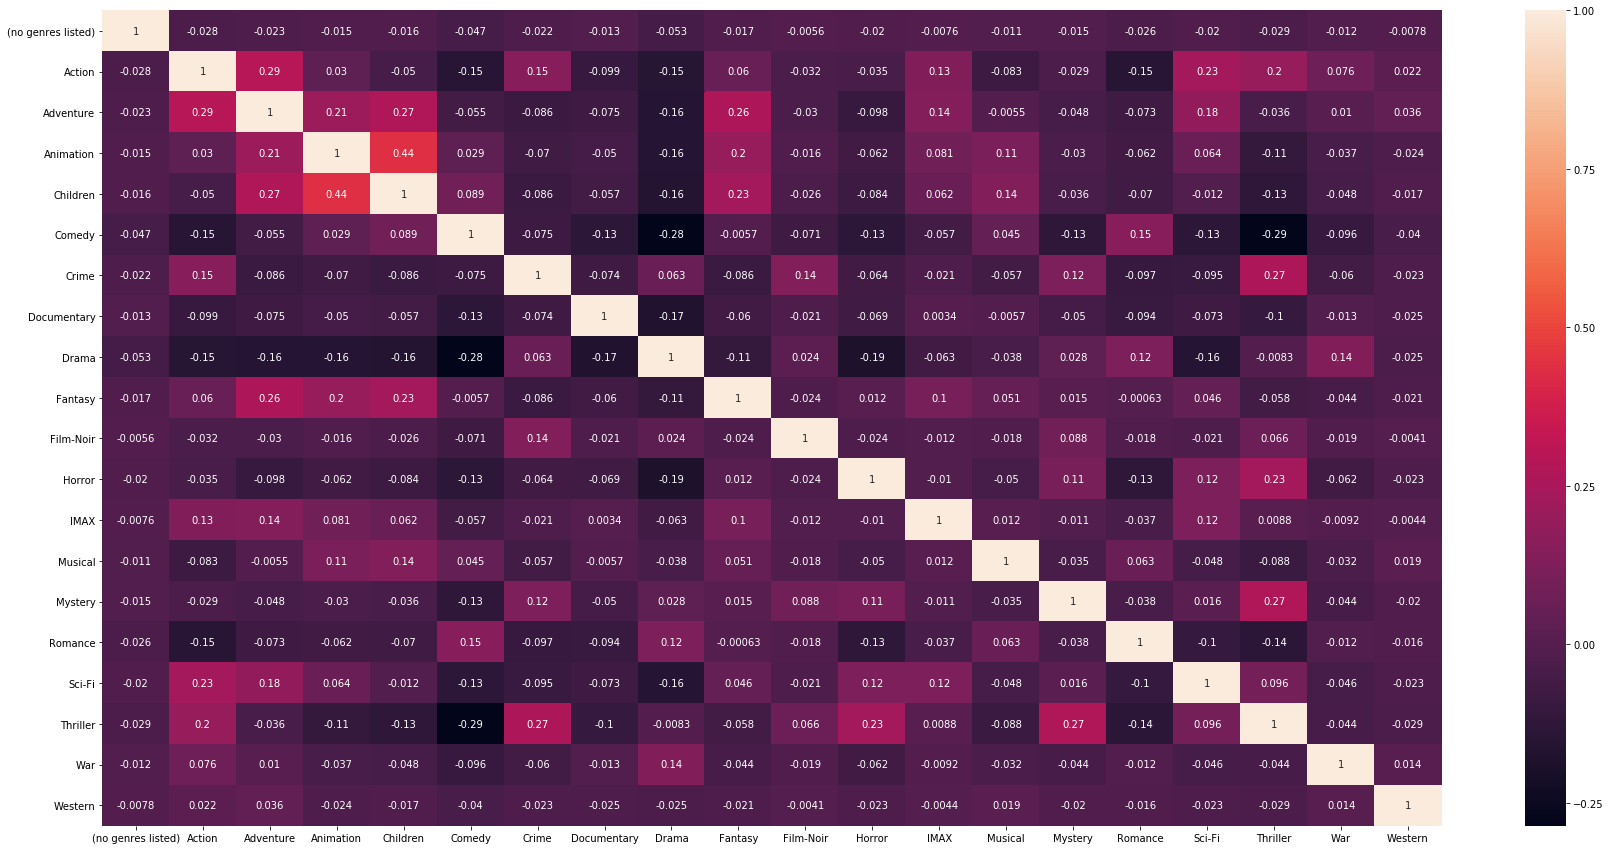

In [24]:
plt.figure(figsize=(30,15))
sns.heatmap(genres_dummies.corr(), annot=True) # annot -> 각 box안에 수치 표시